## **Soal 2 - World Happiness 😄**

Disediakan dataset laporan tingkat kebahagiaan di berbagai negara di dunia, unduh di sini: [World Happiness](https://www.kaggle.com/unsdsn/world-happiness#2019.csv). Gunakan hanya dataset __2019.csv__, lalu buatlah sebuah file _notebook_ (__.ipynb__) dan selesaikanlah beberapa soal berikut:

1. Untuk setiap **numerik** _feature/column_ (kecuali column ```Overall Rank```), hitung dan beri penjelasan (_insight_):
    - Mean, Median dan Modus
    - Range, Q1, Q3 dan IQR
    - Standard Deviasi & Variance
    - Z-score tiap data point

2. Untuk setiap **numerik** _feature/column_ (kecuali column ```Overall Rank```), carilah data _outlier_-nya dan beri penjelasan (_insight_) berdasarkan:
    - IQR method
    - Z-score method

3. Tampilkan distribusi (sebaran data) masing-masing _feature/column_ (kecuali column ```Overall Rank```) dalam bentuk _plot_ yang tepat! Jelaskan alasan pemilihan _plot_ dan _insight_ apa yang Anda dapatkan di setiap _plot_ tersebut!

4. Di antara semua **numerik** _feature/column_ (kecuali column ```Overall Rank```), _feature/column_ mana saja yang sangat berkorelasi terhadap _happiness score_ suatu negara? Hitung dengan metode korelasi yang tepat dan beri penjelasan (_insight_)!

5. Visualisasikan dalam bentuk _plot_ yang tepat untuk menampilkan data berikut:
    - 10 Negara dengan _Healthy life expectancy_ tertinggi.
    - 10 Negara dengan _GDP per capita_ tertinggi.
    - 10 Negara dengan _Perceptions of corruption_ tertinggi.



In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pwd

'A:\\Purwadhika\\Jupyter'

In [4]:
happy_2019 = pd.read_csv('world_happiness_2019.csv') 
#nama dataset sudah diubah dari original download untuk mempermudah identfikasi file

In [5]:
happy_2019

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [6]:
happy_2019.info() 
#melihat informasi dari feature yang ada di data happy_2019, di mana terdiri dari 9 column dengan tidak ada missing value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
Overall rank                    156 non-null int64
Country or region               156 non-null object
Score                           156 non-null float64
GDP per capita                  156 non-null float64
Social support                  156 non-null float64
Healthy life expectancy         156 non-null float64
Freedom to make life choices    156 non-null float64
Generosity                      156 non-null float64
Perceptions of corruption       156 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [16]:
happy_2019_edit = happy_2019.drop(columns=['Overall rank'])

In [104]:
happy_2019_edit.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [105]:
happy_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


1. Untuk setiap **numerik** _feature/column_ (kecuali column ```Overall Rank```), hitung dan beri penjelasan (_insight_):
    - Mean, Median dan Modus
    - Range, Q1, Q3 dan IQR
    - Standard Deviasi & Variance
    - Z-score tiap data point

In [17]:
happy_2019_edit.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [27]:
happy_2019_edit.describe().transpose() #ubah posisi tabel statistics rows jdi columns

,count,mean,std,min,25%,50%,75%,max
Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
GDP per capita,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
Social support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
Healthy life expectancy,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
Freedom to make life choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
Generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
Perceptions of corruption,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


In [160]:
x = happy_2019_edit.select_dtypes(include=[np.number])
range = x.max() - x.min()
range
#dari tabel atas dapat kita ambil range data dari setiap feature dengan dengan value maximum dikurangi dengan value minimun.
#secara tidak langsung dapat mensimpulkan lebarnya pesebaran data, dimana score range cukup besar dbandingkan
#perception of corruption(terendah)

Score                           4.916
GDP per capita                  1.684
Social support                  1.624
Healthy life expectancy         1.141
Freedom to make life choices    0.631
Generosity                      0.566
Perceptions of corruption       0.453
dtype: float64

In [161]:
a = happy_2019_edit.select_dtypes(include=[np.number])
variance = a.var()
variance
#variance adalah pangkat 2 dari standard deviation, menujukan perseberan data. lagi-lagi, untuk score, variancenya sangat tinggi
#dibandingkan yg lainnya

Score                           1.239036
GDP per capita                  0.158714
Social support                  0.089515
Healthy life expectancy         0.058624
Freedom to make life choices    0.020532
Generosity                      0.009073
Perceptions of corruption       0.008937
dtype: float64

In [162]:
b = happy_2019_edit.select_dtypes(include=[np.number])
std_ = b.std()
std_
#standard deviation adalah akar 2 dari variance menunjukan standar Q1 perseberan data.Contoh, untuk menentukan Q1 sisi kanan dri
#distribusi score, maka mean + std itulah titika Q1 berada.

Score                           1.113120
GDP per capita                  0.398389
Social support                  0.299191
Healthy life expectancy         0.242124
Freedom to make life choices    0.143289
Generosity                      0.095254
Perceptions of corruption       0.094538
dtype: float64

In [148]:
c = happy_2019_edit.select_dtypes(include=[np.number])
mod = a.mode()
mod

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,5.208,0.96,1.465,0.815,0.498,0.153,0.028
1,NaN,NaN,NaN,0.999,0.508,NaN,0.078
2,NaN,NaN,NaN,NaN,0.557,NaN,0.089


tabel di atas menunjukan mode (angka yang sering muncul) pada setiap column/features. Terdapat 2 features yang nilai modenya lebih dari 1,yaitu healthy life expenctancy (2 nilai) dan perceptions of corruption (3 nilai)

### Mencari Q1, Q3 dan IQR

In [163]:
happy_2019_edit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
GDP per capita,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
Social support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
Healthy life expectancy,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
Freedom to make life choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
Generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
Perceptions of corruption,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


Q1 dan Q3 terletak pada 25% dan 75% data pada setiap feature/column di atas.

In [171]:
IQR = happy_2019_edit.describe().transpose()['75%'] - happy_2019_edit.describe().transpose()['25%']
IQR

Score                           1.64000
GDP per capita                  0.62975
Social support                  0.39675
Healthy life expectancy         0.33400
Freedom to make life choices    0.19925
Generosity                      0.13950
Perceptions of corruption       0.09425
dtype: float64

In [ ]:
batas_bawah = countrystats['25%'] - (1.5iqr)
batas_atas = countrystats['75%'] + (1.5iqr)

In [176]:
batas_bawah = happy_2019_edit.describe().transpose()['25%'] - (1.5*IQR)
batas_atas = happy_2019_edit.describe().transpose()['75%'] + (1.5*IQR)

outlier = []
for i in happy_2019_edit:
    if i < batas_bawah or i > batas_atas:
        outlier.append(i)
        return outlier


SyntaxError: 'return' outside function (<ipython-input-176-cc49728cf2db>, line 8)

In [179]:
happy_2019_stats = happy_2019.describe().transpose().drop(index='Overall rank')
display(happy_2019_stats)

# MENCARI OUTLIER MASING2 FEATURE MENGGUNAKAN IQR

iqr = happy_2019_stats['75%'] - happy_2019_stats['25%']
batas_bawah = happy_2019_stats['25%'] - (1.5*iqr)
batas_atas = happy_2019_stats['75%'] + (1.5*iqr)

score_outlier = [i for i in happy_2019['Score'] if i < batas_bawah['Score'].item() or i > batas_atas['Score'].item()]

GDP_outlier = [i for i in happy_2019['GDP per capita'] if i < batas_bawah['GDP per capita'].item() or 
               i > batas_atas['GDP per capita'].item()]

social_support_outlier = [i for i in happy_2019['Social support'] if i < batas_bawah['Social support'].item() or 
               i > batas_atas['Social support'].item()]

life_ext_outlier = [i for i in happy_2019['Healthy life expectancy'] if i < batas_bawah['Healthy life expectancy'].item() or 
               i > batas_atas['Healthy life expectancy'].item()]

freedom_outlier = [i for i in happy_2019['Freedom to make life choices'] 
                      if i < batas_bawah['Freedom to make life choices'].item() or 
                      i > batas_atas['Freedom to make life choices'].item()]

generosity_outlier = [i for i in happy_2019['Generosity'] if i < batas_bawah['Generosity'].item() or 
               i > batas_atas['Generosity'].item()]

corroption_outlier= [i for i in happy_2019['Perceptions of corruption'] if i < batas_bawah['Perceptions of corruption'].item() or 
               i > batas_atas['Perceptions of corruption'].item()]

,count,mean,std,min,25%,50%,75%,max
Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
GDP per capita,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
Social support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
Healthy life expectancy,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
Freedom to make life choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
Generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
Perceptions of corruption,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


In [183]:
score_outlier

[]

In [184]:
GDP_outlier

[]

In [185]:
social_support_outlier

[0.43700000000000006, 0.447, 0.37799999999999995, 0.0]

In [186]:
life_ext_outlier

[0.0]

In [187]:
freedom_outlier

[0.0]

In [188]:
generosity_outlier

[0.498, 0.5660000000000001]

In [189]:
corroption_outlier

[0.39299999999999996,
 0.41,
 0.341,
 0.298,
 0.34299999999999997,
 0.373,
 0.38,
 0.308,
 0.29,
 0.316,
 0.31,
 0.45299999999999996,
 0.287,
 0.41100000000000003]

In [204]:
from scipy import stats
z_score = np.abs(stats.zscore(happy_2019_edit.select_dtypes(include=[np.number]))) 

#threshold = 2.5
search_outlier = np.where(z_score > 2.5)
index_outlier = list(search_outlier)[0].tolist()
del index_outlier[0]
index_outlier

[1, 6, 7, 33, 91, 101, 130, 134, 144, 146, 148, 148, 151, 153, 154, 154, 155]

ini adalah index yg terdapat outlier menggunakan teknik z score

In [210]:
# where is the data?
data_outlier = []
for i in index_outlier:
    data_outlier.append(happy_2019_edit.iloc[i])

data_outlier

[Country or region               Denmark
 Score                               7.6
 GDP per capita                    1.383
 Social support                    1.573
 Healthy life expectancy           0.996
 Freedom to make life choices      0.592
 Generosity                        0.252
 Perceptions of corruption          0.41
 Name: 1, dtype: object, Country or region               Sweden
 Score                            7.343
 GDP per capita                   1.387
 Social support                   1.487
 Healthy life expectancy          1.009
 Freedom to make life choices     0.574
 Generosity                       0.267
 Perceptions of corruption        0.373
 Name: 6, dtype: object, Country or region               New Zealand
 Score                                 7.307
 GDP per capita                        1.303
 Social support                        1.557
 Healthy life expectancy               1.026
 Freedom to make life choices          0.585
 Generosity                       

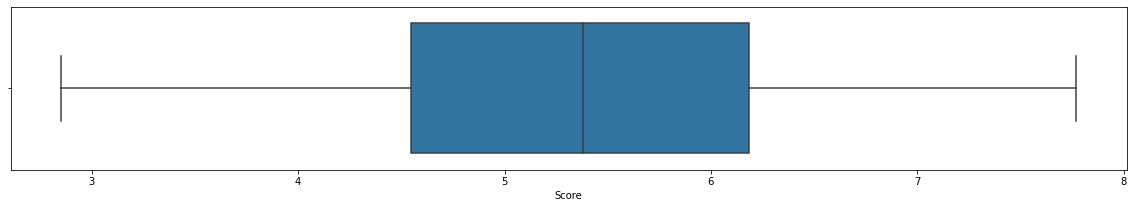

In [125]:
 plt.subplots(figsize=(20,3))

#Boxplot Score
sns.boxplot(x = happy_2019_edit['Score'])

Dari gambar boxplot di atas, tidak ada oulier yg tampak dengan mean yg agak ke arah kiri ~5.5). kemungkinan terdapat sedikit outlier sehingga mean agak ke arah kiri (ke arah angka 5)

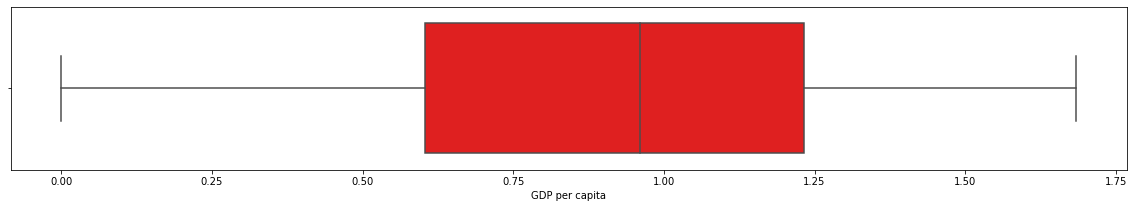

In [128]:
 plt.subplots(figsize=(20,3))

#Boxplot GDP per capita
sns.boxplot(x = happy_2019_edit['GDP per capita'], color = 'red')

Dari gambar boxplot di atas, mean tidak persis center, dimana ada data GDP yang kemungkinan besar banyak di sisi kanan sedikit, (sedkikit righ skewed)

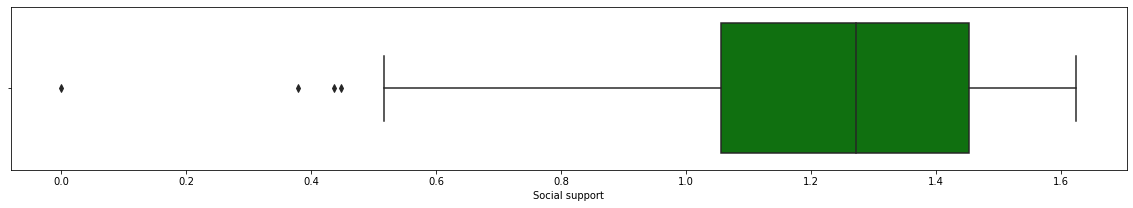

In [129]:
 plt.subplots(figsize=(20,3))

#Boxplot GDP per capita
sns.boxplot(x = happy_2019_edit['Social support'], color = 'green')

Data untuk social support left skewed terdapat jelas outlier (mungkin di beberapa negara yang social supportnya kurang baik)

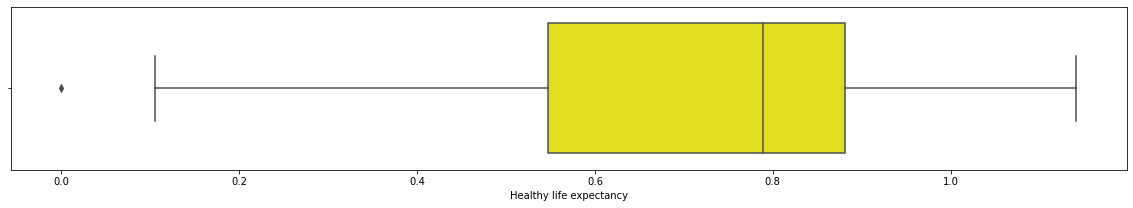

In [135]:
plt.subplots(figsize=(20,3))

#Boxplot Healthy life expectancy
sns.boxplot(x = happy_2019_edit['Healthy life expectancy'], color = 'yellow')

Sama halnya dengan social support, untk healthy life expectancy, left skewed, terdapat outlier di sisi kiri sehingga mempengaruhi mean dri yang geser ke arah 0.8

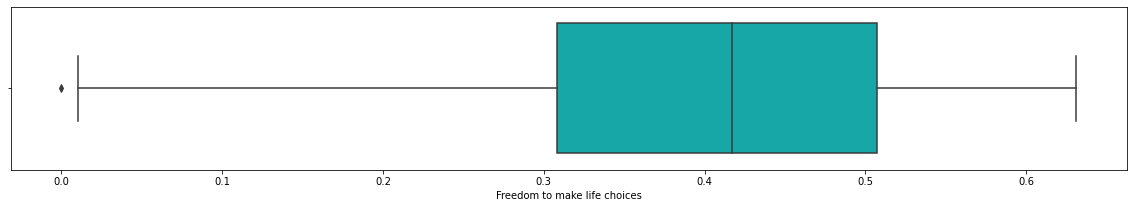

In [137]:
 plt.subplots(figsize=(20,3))

#Boxplot Freedom to make life choices
sns.boxplot(x = happy_2019_edit['Freedom to make life choices'], color = 'c')

untuk freedom to make life choices, ada negara yg nilai kecil sehingga menimbulkan left skewed data

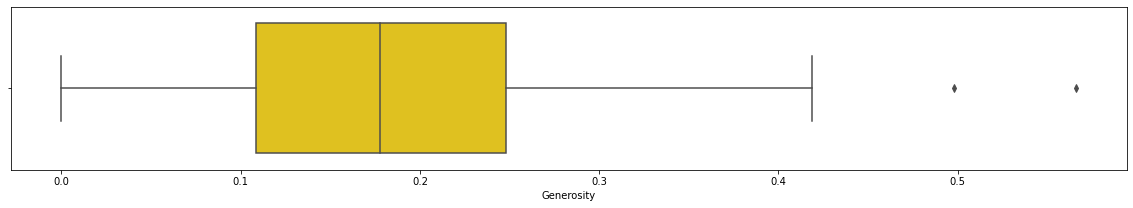

In [139]:
plt.subplots(figsize=(20,3))

#Boxplot Freedom to make life choices
sns.boxplot(x = happy_2019_edit['Generosity'], color = 'gold')

Tidak semua negara sangat generous (baik hati) sehingga lebih ke arah kiri secara mean, namun ada beberapa data yg outlier dimana negara tersebut sangat generous

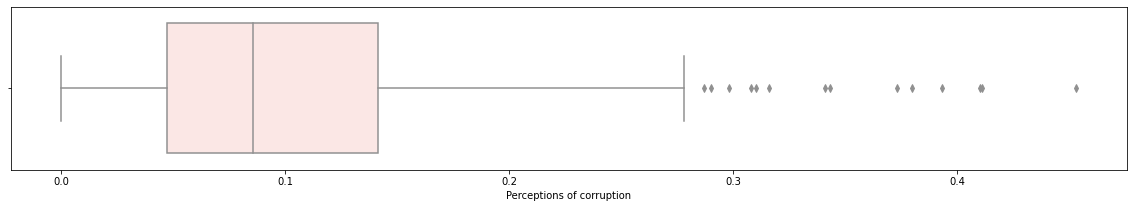

In [141]:
plt.subplots(figsize=(20,3))

#Boxplot Perceptions of corruption
sns.boxplot(x = happy_2019_edit['Perceptions of corruption'], color = 'mistyrose')

untuk perception of corruption, outlier sangat byk di angka 0.3 hingga lebih dari 0.4, dan jika diperhatikan, masih banyak yang negaranya korupsi terhadap rakyatnya

4. Di antara semua **numerik** _feature/column_ (kecuali column ```Overall Rank```), _feature/column_ mana saja yang sangat berkorelasi terhadap _happiness score_ suatu negara? Hitung dengan metode korelasi yang tepat dan beri penjelasan (_insight_)!

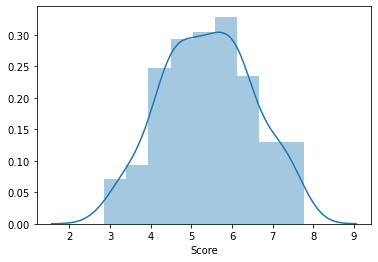

In [118]:
sns.distplot(happy_2019_edit['Score'])

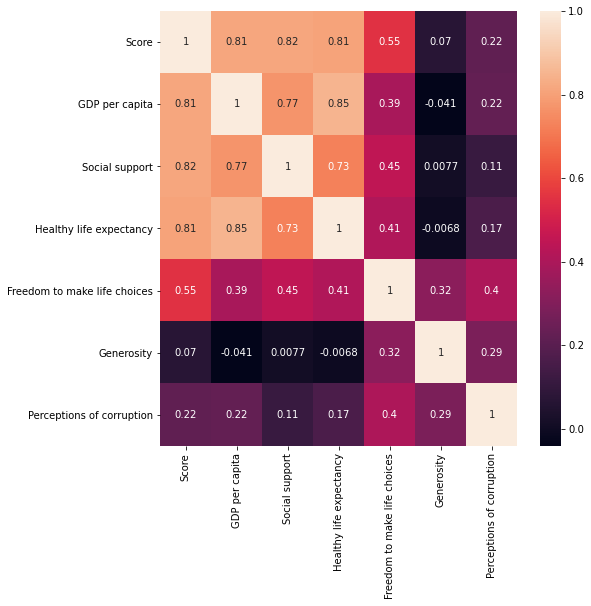

In [106]:
plt.figure(figsize = (8,8))
sns.heatmap(happy_2019_edit.corr('spearman'), annot = True) 
#

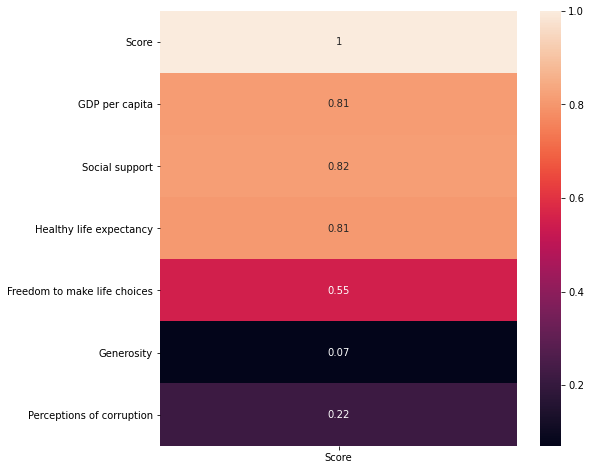

In [115]:
plt.figure(figsize = (8,8))
sns.heatmap(happy_2019_edit.corr('spearman')[['Score']], annot = True)

### Jawaban no 4:
untuk hal ini setelah dibuatkan heatmap, dapat disimpulkan bahwa terdapat 3 faktor kuat yang mempengaruhi score happy, yakni GDP per capita, social support dan Healthy life expectancy. Angka mereka sangat tinggi (dikisaran 0.81-0.82, ke arah positive correlation). Dan memang ketika di suatu negara dimana penghasilan rakyatnya tinggi, dukungan sosial dan life expectancy (harapan hidup) tinggi pula, membuat rakyatnya sangat bahagia. Setiap rakyat ketika dapat penghasilan lebih, seharusnya tidak ada masalah dengan daya beli untuk memenuhi kebutuhan masing-masing.

Berikut adalah pembuktian tambahan atas 3 columns/feature yang mempunyai korelasi kuat dengan score of happiness

In [153]:
import scipy.stats
r2, p2 = scipy.stats.spearmanr(happy_2019_edit['Score'], happy_2019_edit['GDP per capita'])

print('coefficient:', r2)
print('pvalue', p2)

# interpret the significance
alpha = 0.05
if p2 < alpha:
    print(f'Samples are correlated (reject H0) p={p2}')
else:
    print(f'Samples are uncorrelated (fail to reject H0) p={p2}')

coefficient: 0.8144834033942763
pvalue 3.052425844116973e-38
Samples are correlated (reject H0) p=3.052425844116973e-38


In [154]:
import scipy.stats
r2, p2 = scipy.stats.spearmanr(happy_2019_edit['Score'], happy_2019_edit['Social support'])

print('coefficient:', r2)
print('pvalue', p2)

# interpret the significance
alpha = 0.05
if p2 < alpha:
    print(f'Samples are correlated (reject H0) p={p2}')
else:
    print(f'Samples are uncorrelated (fail to reject H0) p={p2}')

coefficient: 0.8161807357057258
pvalue 1.613098226311642e-38
Samples are correlated (reject H0) p=1.613098226311642e-38


In [155]:
import scipy.stats
r2, p2 = scipy.stats.spearmanr(happy_2019_edit['Score'], happy_2019_edit['Healthy life expectancy'])

print('coefficient:', r2)
print('pvalue', p2)

# interpret the significance
alpha = 0.05
if p2 < alpha:
    print(f'Samples are correlated (reject H0) p={p2}')
else:
    print(f'Samples are uncorrelated (fail to reject H0) p={p2}')

coefficient: 0.8072745738421483
pvalue 4.267176823442759e-37
Samples are correlated (reject H0) p=4.267176823442759e-37


### 5. Visualisasikan dalam bentuk _plot_ yang tepat untuk menampilkan data berikut:
    - 10 Negara dengan _Healthy life expectancy_ tertinggi.
    - 10 Negara dengan _GDP per capita_ tertinggi.
    - 10 Negara dengan _Perceptions of corruption_ tertinggi.

In [108]:
happy_2019_edit.sort_values(
    by = 'Healthy life expectancy', ascending = False)[['Healthy life expectancy',
                                                        'Country or region']].head(10) 

,Healthy life expectancy,Country or region
33,1.141,Singapore
75,1.122,Hong Kong
57,1.088,Japan
29,1.062,Spain
5,1.052,Switzerland
23,1.045,France
48,1.042,Cyprus
63,1.042,Northern Cyprus
35,1.039,Italy
8,1.039,Canada


In [109]:
healthy_filtered_happy_2019 = happy_2019_edit.sort_values(
    by = 'Healthy life expectancy', ascending = False)[['Healthy life expectancy',
                                                        'Country or region']].head(10) 

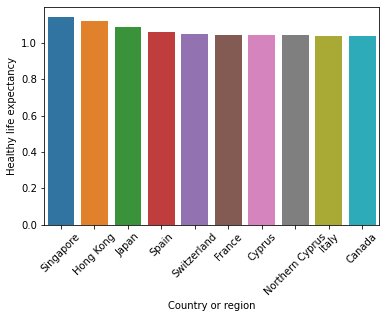

In [79]:
chart1 = sns.barplot(x="Country or region", y="Healthy life expectancy", data=healthy_filtered_happy_2019)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)
plt.show()

- 10 Negara dengan _Healthy life expectancy_ tertinggi. 
- Dari gambar ini, dapat disimpulkan bahwa, singapore menjadi negara tertinggi untuk nilai healthy life expectancy

In [110]:
GDP_filtered_happy_2019 = happy_2019_edit.sort_values(
    by = 'GDP per capita', ascending = False)[['GDP per capita','Country or region']].head(10) 

GDP_filtered_happy_2019

,GDP per capita,Country or region
28,1.684,Qatar
13,1.609,Luxembourg
33,1.572,Singapore
20,1.503,United Arab Emirates
50,1.500,Kuwait
15,1.499,Ireland
2,1.488,Norway
5,1.452,Switzerland
75,1.438,Hong Kong
18,1.433,United States


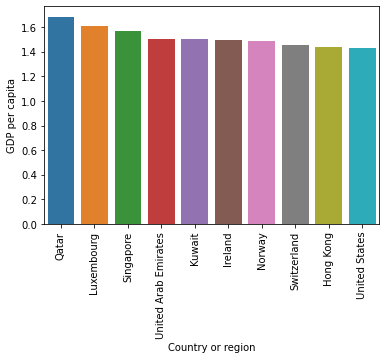

In [142]:
chart2 = sns.barplot(x= "Country or region", y="GDP per capita", data=GDP_filtered_happy_2019)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)
plt.show()

- 10 Negara dengan _GDP per capita_ tertinggi.
- Untuk kasus ini, Qatat menjadi negara berpenghasilan paling tinggi berdasarkan GDP per capita mereka

In [113]:
corrupt_filtered_happy_2019 = happy_2019_edit.sort_values(
    by = 'Perceptions of corruption', ascending = False)[['Perceptions of corruption','Country or region']].head(10) 

corrupt_filtered_happy_2019

,Perceptions of corruption,Country or region
33,0.453,Singapore
151,0.411,Rwanda
1,0.410,Denmark
0,0.393,Finland
7,0.380,New Zealand
6,0.373,Sweden
5,0.343,Switzerland
2,0.341,Norway
13,0.316,Luxembourg
15,0.310,Ireland


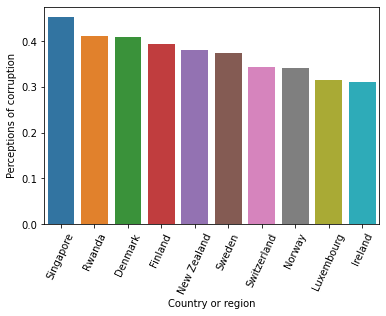

In [114]:
chart3 = sns.barplot(x= 'Country or region', y='Perceptions of corruption', data = corrupt_filtered_happy_2019)
chart3.set_xticklabels(chart3.get_xticklabels(), rotation=65)
plt.show()

- 10 Negara dengan _Perceptions of corruption_ tertinggi

Di mana 10 negara ini adalah negara yang paling tidak korupsi dibandingkan negara lain, bila angkanya rendah, berarti negara itu lebih diasumsikan korup dari negara lain

In [159]:
happy_2019[['Perceptions of corruption','Country or region','Score']]

,Perceptions of corruption,Country or region,Score
0,0.393,Finland,7.769
1,0.410,Denmark,7.600
2,0.341,Norway,7.554
3,0.118,Iceland,7.494
4,0.298,Netherlands,7.488
...,...,...,...
151,0.411,Rwanda,3.334
152,0.147,Tanzania,3.231
153,0.025,Afghanistan,3.203
154,0.035,Central African Republic,3.083


In [143]:
from scipy.stats import zscore

df_zscore = np.abs(happy_2019_edit.drop('Country or region', axis = 1).apply(zscore))
df_zscore


,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,2.128711,1.095042,1.268098,1.080422,1.424282,0.335404,2.996757
1,1.976397,1.203324,1.221154,1.121857,1.396277,0.707265,3.177158
2,1.934938,1.467734,1.251332,1.254446,1.473292,0.907373,2.444941
3,1.880862,1.195769,1.392163,1.246159,1.389276,1.781530,0.078500
4,1.875454,1.236060,1.050146,1.134287,1.151229,1.444506,1.988632
...,...,...,...,...,...,...,...
151,1.868418,1.375303,1.669224,0.460929,1.137227,0.338645,3.187770
152,1.961248,1.080675,1.085783,0.937421,0.171040,0.960033,0.386244
153,1.986484,1.397967,2.319726,1.509213,2.748526,0.282744,0.908401
154,2.094636,2.213861,4.053282,2.569928,1.173221,0.528221,0.802283


### Experimental dengan distribution plot

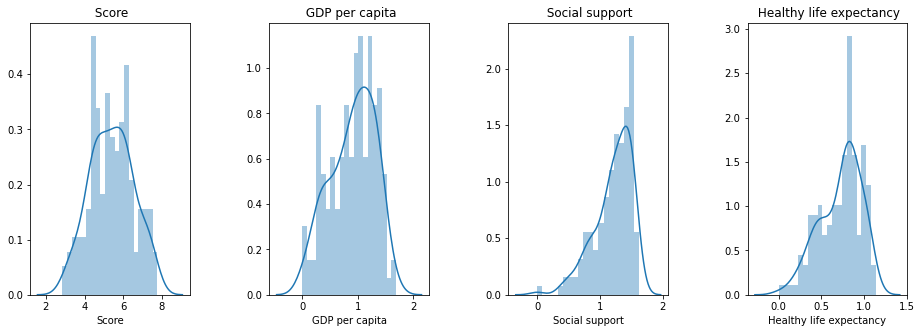

In [211]:
plt.figure(2, figsize = (20,5))
n = 0
for x in ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy']:
    n += 1
    plt.subplot(1, 5, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(happy_2019_edit[x], bins = 20)
    plt.title(' {}'.format(x))
plt.show()

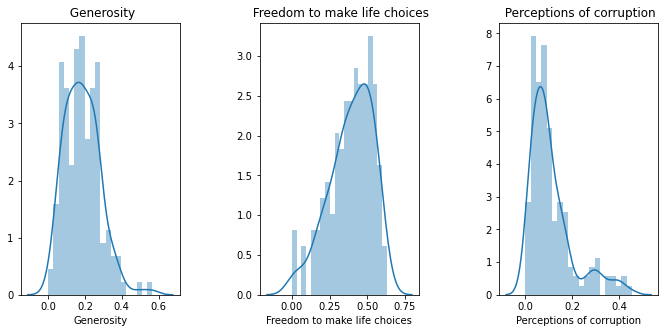

In [212]:
plt.figure(2, figsize = (20,5))
n = 0
for x in ['Generosity','Freedom to make life choices','Perceptions of corruption']:
    n += 1
    plt.subplot(1, 5, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(happy_2019_edit[x], bins = 20)
    plt.title(' {}'.format(x))
plt.show()